In [17]:
import pandas as pd
from multi_factors_backtest import *

In [18]:
#读取数据
df_factor = pd.read_parquet('../Data_test/factor.parquet')
df_price = pd.read_parquet('../Data_test/price.parquet')
df_pool = pd.read_pickle('../Data_test/pool.pkl')
df_benchmark = pd.read_pickle('../Data_test/benchmark.pkl')
df_group = pd.read_pickle('../Data_test/group.pkl')

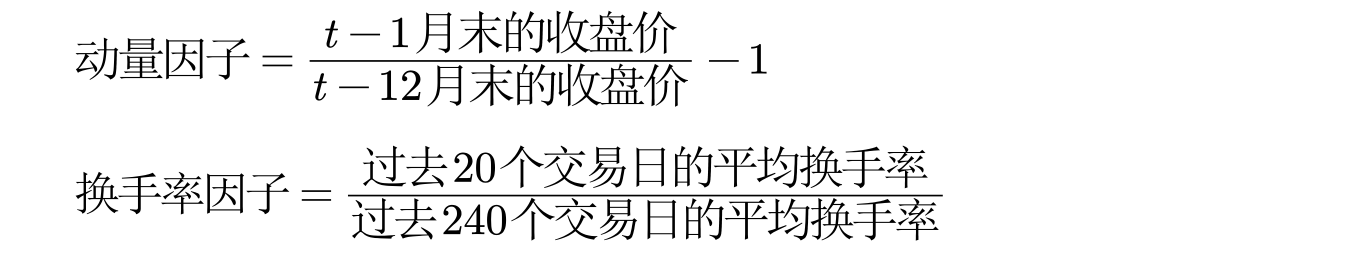

In [19]:
#因子数据
df_factor

,,momentum240_20,turnover240_20
date,asset,,
2013-01-31,sh600000,0.094650,2.490285
2013-02-28,sh600000,0.152400,2.366177
2013-03-29,sh600000,0.297448,1.790340
2013-04-26,sh600000,0.167465,1.068705
2013-05-31,sh600000,0.182583,0.882490
...,...,...,...
2023-12-01,sz301389,-0.126617,1.923714
2023-11-30,sz301391,0.081249,0.852545
2023-12-01,sz301391,0.033944,0.868180


In [20]:
#收盘价格
df_price

,,price
date,asset,
2013-01-04,sh600000,69.398
2013-01-07,sh600000,71.401
2013-01-08,sh600000,69.674
2013-01-09,sh600000,69.813
2013-01-10,sh600000,69.536
...,...,...
2023-11-29,sz301559,20.486
2023-11-30,sz301559,20.101
2023-11-28,sz301568,66.780


In [21]:
#基准收益中证五百 000905
df_benchmark

{'000905':                000905
 date                 
 2011-01-04  5011.4980
 2011-01-05  5028.7660
 2011-01-06  5001.2830
 2011-01-07  4975.1440
 2011-01-10  4830.5620
 ...               ...
 2023-07-24  5916.7141
 2023-07-25  6016.6312
 2023-07-26  6001.5402
 2023-07-27  5961.1843
 2023-07-28  6043.2438
 
 [3055 rows x 1 columns]}

In [22]:
#上市超过1年的沪深A股，剔除ST股、停牌股
df_pool

{'000905': Empty DataFrame
 Columns: []
 Index: [(2013-01-04 00:00:00, sh600000), (2013-01-07 00:00:00, sh600000), (2013-01-08 00:00:00, sh600000), (2013-01-09 00:00:00, sh600000), (2013-01-10 00:00:00, sh600000), (2013-01-11 00:00:00, sh600000), (2013-01-14 00:00:00, sh600000), (2013-01-15 00:00:00, sh600000), (2013-01-16 00:00:00, sh600000), (2013-01-17 00:00:00, sh600000), (2013-01-18 00:00:00, sh600000), (2013-01-21 00:00:00, sh600000), (2013-01-22 00:00:00, sh600000), (2013-01-23 00:00:00, sh600000), (2013-01-24 00:00:00, sh600000), (2013-01-25 00:00:00, sh600000), (2013-01-28 00:00:00, sh600000), (2013-01-29 00:00:00, sh600000), (2013-01-30 00:00:00, sh600000), (2013-01-31 00:00:00, sh600000), (2013-02-01 00:00:00, sh600000), (2013-02-04 00:00:00, sh600000), (2013-02-05 00:00:00, sh600000), (2013-02-06 00:00:00, sh600000), (2013-02-07 00:00:00, sh600000), (2013-02-08 00:00:00, sh600000), (2013-02-18 00:00:00, sh600000), (2013-02-19 00:00:00, sh600000), (2013-02-20 00:00:00, sh600

In [23]:
#行业数据
df_group

,,group
date,asset,
2013-01-31,sh600000,Banking
2013-02-28,sh600000,Banking
2013-03-29,sh600000,Banking
2013-04-26,sh600000,Banking
2013-05-31,sh600000,Banking
...,...,...
2023-12-01,sz301389,Electronics
2023-11-30,sz301391,Computer
2023-12-01,sz301391,Computer


In [24]:
# 调仓频率：月度调仓，每个月第一个交易日开盘为调仓期
Backtest = MultiFactor_MultiPool_BackTest(
    factor_data=df_factor,
    price_data=df_price,
    benchmark_data=df_benchmark,
    pool_data=df_pool,
    start_date='20130101',
    end_date='20221231',
    is_daily_factor= False,
    group_data=df_group,
    direction= {'momentum240_20':1,'turnover240_20':-1},
    quantiles=10)
Backtest.generate_single_factor_pool_object()

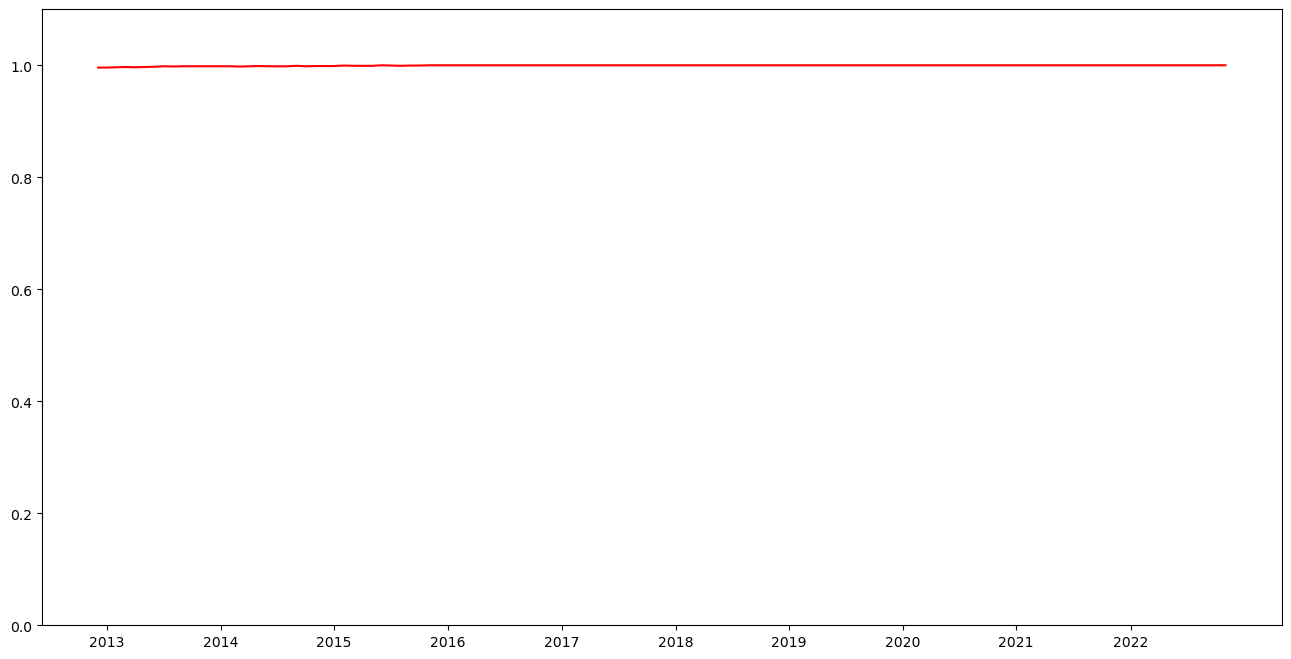

In [35]:
#获取因子覆盖率
Backtest.plot_factor_coverage(factor_name= 'turnover240_20',pool_name = '000905')

In [37]:
#因子描述性统计
Backtest.analyse_factor_descriptive_statistics(factor_name= 'turnover240_20',pool_name = '000905')

,样本量,均值,标准差,偏度,峰度,最小值,p10,p25,p50,p75,p90,最大值,中位数绝对偏差
factor_quantile,,,,,,,,,,,,,
1,34946,0.366056,0.165054,1.615242,3.587144,0.010248,0.206290,0.262519,0.330032,0.425142,0.572989,1.145442,0.077324
2,34883,0.526297,0.202862,1.754248,3.309621,0.259396,0.343042,0.390575,0.466486,0.595134,0.789398,1.395326,0.090737
3,34870,0.627698,0.230345,1.679410,2.981284,0.315765,0.416848,0.471477,0.557939,0.711349,0.928416,1.592097,0.106430
4,34890,0.720563,0.252940,1.605365,2.700542,0.367832,0.483878,0.547902,0.645807,0.814907,1.061082,1.797334,0.119082
5,34885,0.815712,0.273187,1.541691,2.545519,0.415034,0.554430,0.630111,0.737478,0.923721,1.186413,1.993435,0.130717
6,34861,0.921712,0.292403,1.463766,2.372619,0.473150,0.636165,0.724047,0.840773,1.046422,1.332269,2.194239,0.144085
7,34875,1.048602,0.313012,1.359597,2.103728,0.532401,0.732998,0.834402,0.966898,1.189257,1.501631,2.422918,0.160850
8,34885,1.221057,0.338347,1.204811,1.753212,0.610409,0.862178,0.983131,1.140819,1.386017,1.720316,2.706485,0.186924
9,34868,1.503555,0.385231,0.943944,1.108199,0.745804,1.070763,1.226068,1.431517,1.712825,2.048091,3.202208,0.234463


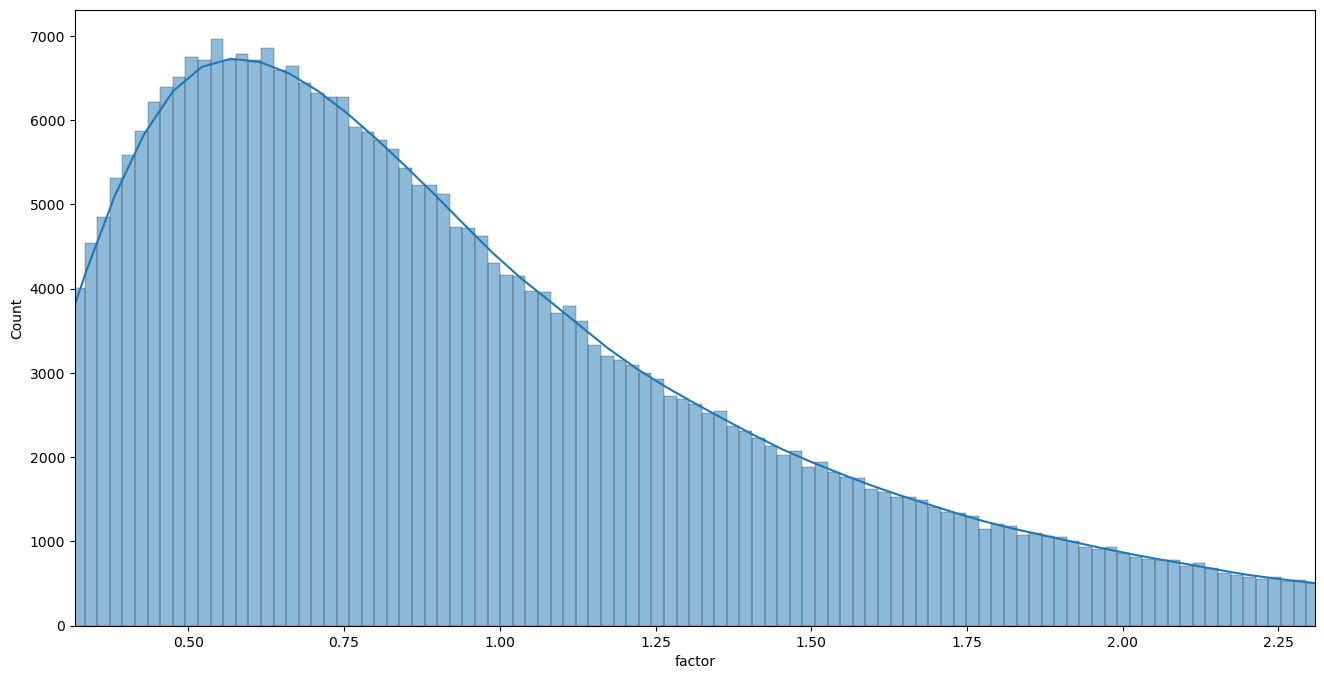

In [38]:
#因子分布直方图和密度图
Backtest.plot_factor_distribution(factor_name='turnover240_20',pool_name = '000905')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


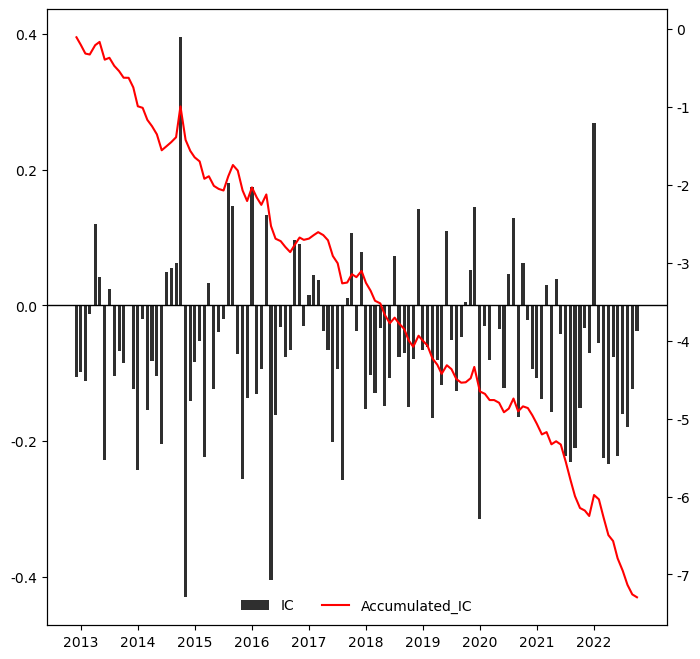

In [25]:
#IC 和 累计 IC
Backtest.plot_ic(factor_name='turnover240_20',pool_name='000905',bar_figure=True)

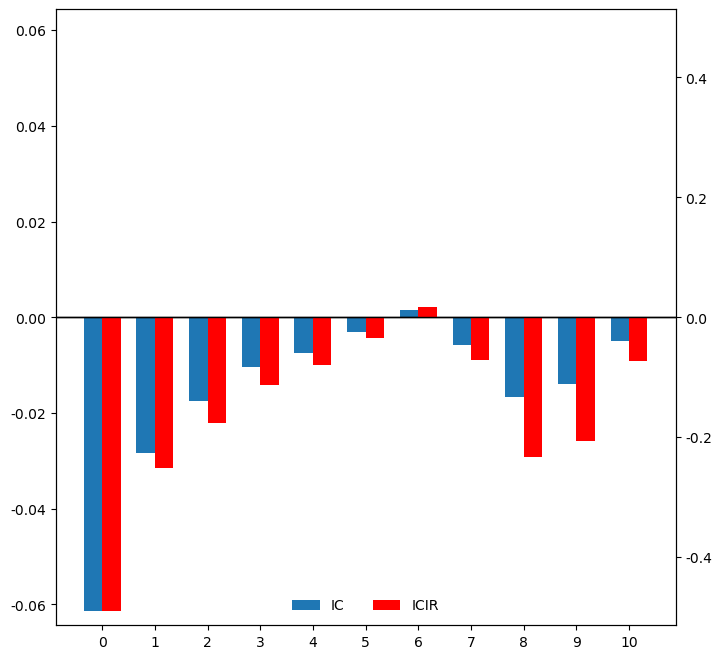

In [39]:
Backtest.plot_ic_dacay(factor_name='turnover240_20',pool_name = '000905')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


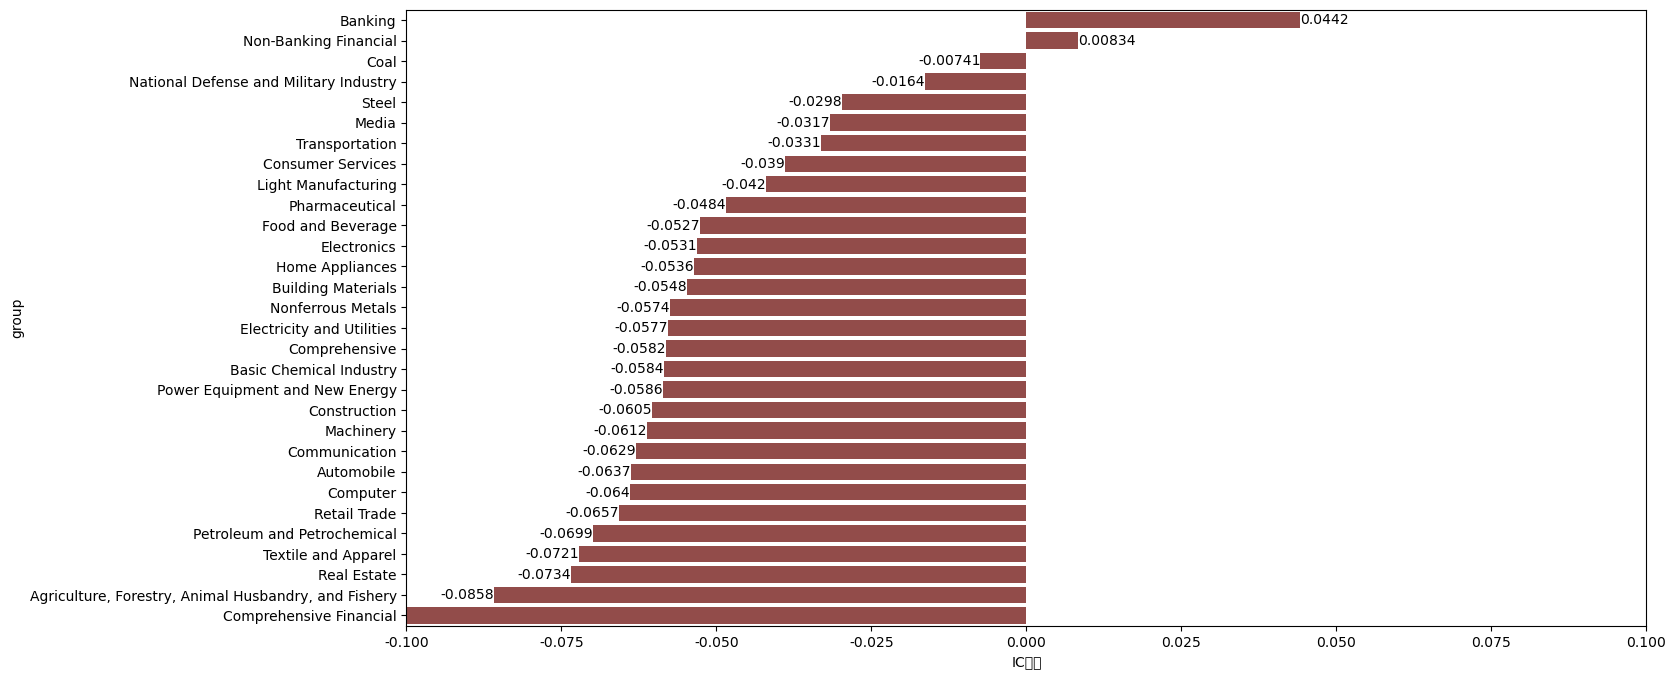

In [26]:
#分行业IC
Backtest.plot_ic(factor_name='turnover240_20',pool_name='000905',ic_type='grouped_ic',bar_figure=True)

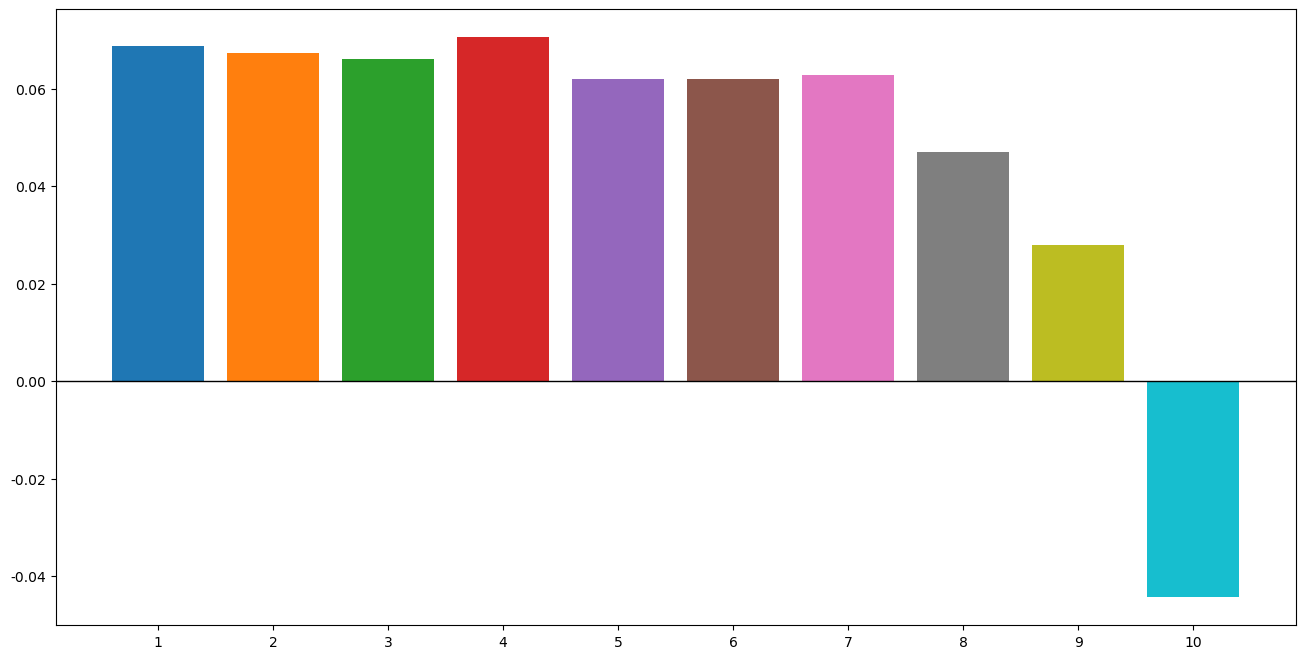

In [27]:
# 绘制不同分组的年化收益柱形图
Backtest.plot_quantile_annualized_return(factor_name='turnover240_20',pool_name='000905')

In [28]:
# 输出因子分组收益情况的详细分析
Backtest.analyse_return_array(factor_name='turnover240_20',pool_name='000905')

,年化收益,年化波动率,夏普比率,最大回撤,卡玛比率,超额年化收益,超额年化波动率,信息比率,超额最大回撤,超额收益卡玛比率,相对基准胜率,相对整体胜率,盈亏比
factor_quantile,,,,,,,,,,,,,
1,0.109201,0.283250,0.332574,-0.631044,0.173049,0.068707,0.162225,0.423531,-0.208598,0.329376,0.621849,0.220339,1.125728
2,0.106670,0.287056,0.319344,-0.604559,0.176442,0.067324,0.160078,0.420573,-0.212415,0.316948,0.605042,0.127119,1.224322
3,0.104852,0.289872,0.309969,-0.573998,0.182669,0.066106,0.160436,0.412038,-0.211740,0.312202,0.563025,0.059322,1.485806
4,0.108793,0.293312,0.319772,-0.539899,0.201506,0.070510,0.161544,0.436472,-0.183981,0.383245,0.605042,0.076271,1.374553
5,0.099964,0.292660,0.290316,-0.540660,0.184893,0.061928,0.160756,0.385228,-0.173013,0.357936,0.596639,0.042373,1.304829
6,0.099150,0.296084,0.284208,-0.548605,0.180730,0.061853,0.160784,0.384693,-0.159130,0.388693,0.588235,0.050847,1.365925
7,0.099231,0.303269,0.277742,-0.561567,0.176703,0.062806,0.166766,0.376612,-0.177076,0.354683,0.638655,0.084746,1.157785
8,0.081984,0.308447,0.217167,-0.580538,0.141222,0.046952,0.169229,0.277446,-0.176368,0.266216,0.546218,0.135593,1.392158
9,0.061153,0.318534,0.144892,-0.650143,0.094061,0.027993,0.177504,0.157703,-0.180209,0.155336,0.546218,0.076271,1.058789


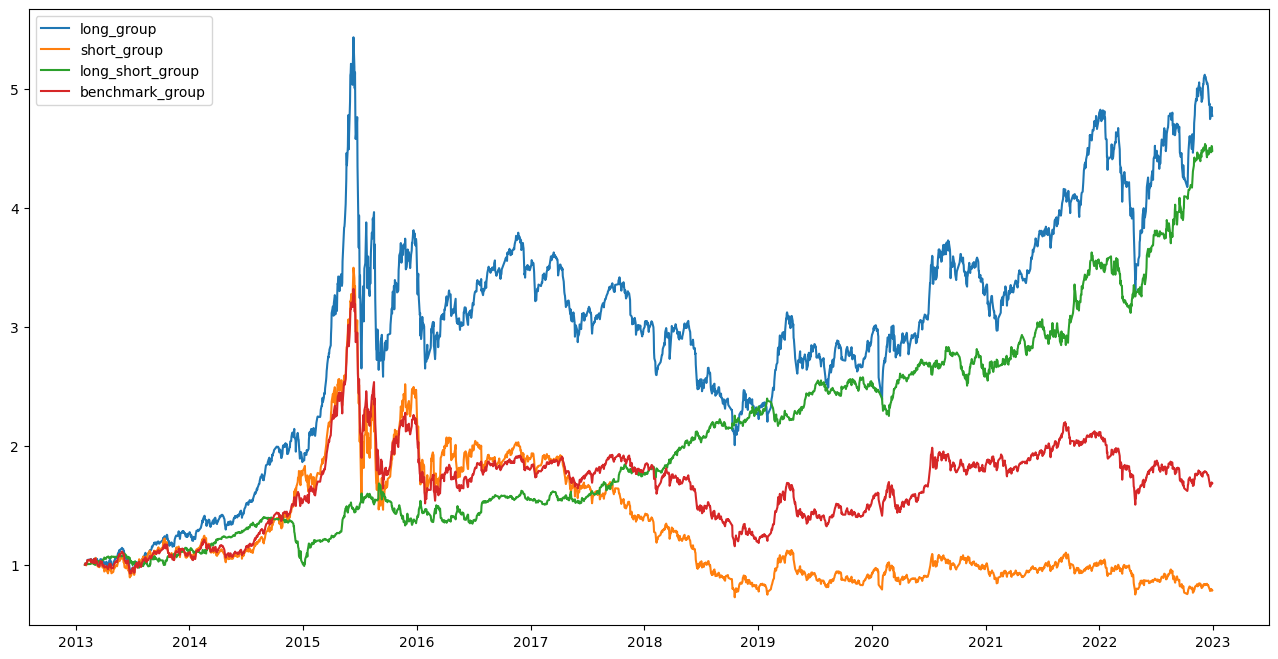

In [29]:
# 绘制净值曲线
Backtest.plot_accumulated_net_value(factor_name='turnover240_20',pool_name='000905',plot_type='long_short')

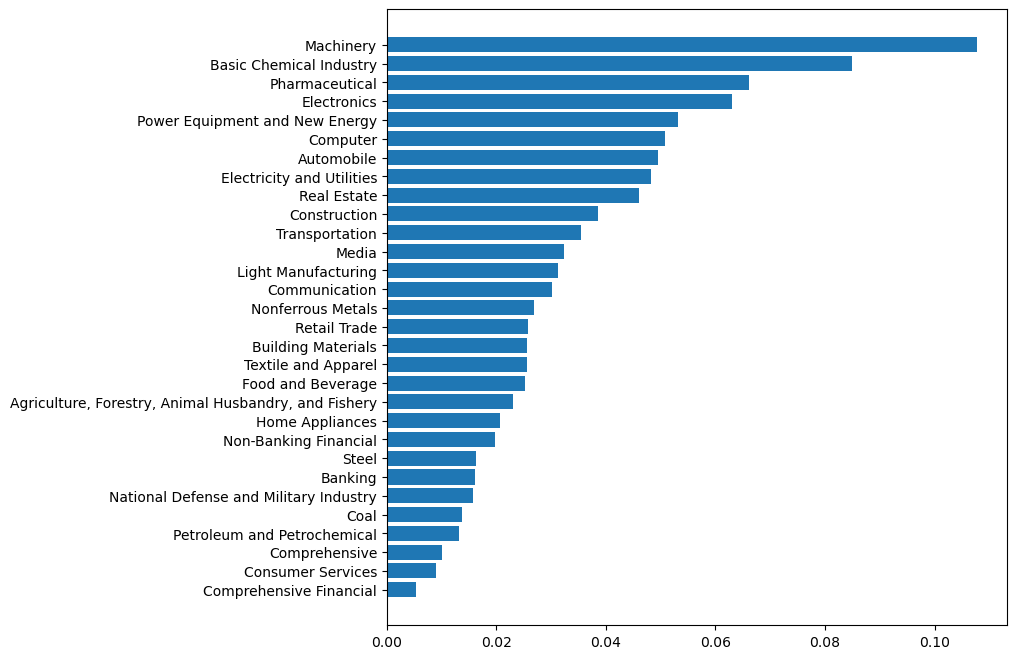

In [30]:
# 绘制因子的多头组合的行业分布图
Backtest.plot_factor_group_distribution(factor_name='turnover240_20',pool_name='000905')